# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. Only have to use numpy and matplotlib for this question.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# (a) Load data (features)
def load_data():
    data = np.load('q3-data/features.npy')
    labels = np.load('q3-data/labels.npy')

    mean = np.mean(data, axis=0)
    mean = np.array(mean, ndmin=2)    
    data = np.subtract(data, mean)

    mean2 = np.mean(data, axis=0)
    stdvn = np.std(data, axis=0)
    stdvn = np.array(stdvn, ndmin=2)
    print(stdvn.shape, stdvn)

    data = data/stdvn
    print(np.std(data, axis=0))

    return data, labels

datafile, labels = load_data()


(1, 8) [[0.82530129 0.43214658 1.75852918 0.76061262 1.29681839 1.18787014
  1.93816328 1.22044697]]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [3]:
labels = labels.astype(int)
print(labels.shape, labels.dtype)


(150,) int64


In [4]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(X):
    
    # covariance matrix:
        
    # cov_mat = (X - np.mean(X, axis=0)).T.dot((X - np.mean(X, axis=0))) / (X.shape[0]-1)   #verbose way
    cov_mat = np.cov(X.T)
    print(cov_mat.shape, type(cov_mat), cov_mat)
       
    # Eigendecomposition on coveriance matrix, cov_mat:
    
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    
    print('Eigenvectors \n%s' %eig_vecs)
    print('\nEigenvalues \n%s' %eig_vals)
    
    # softing eigenvalues in decreasing order and corresponding eigenvectors:
    
    idx = eig_vals.argsort()[::-1]
    sorted_eig_vals = eig_vals[idx]
    sorted_eig_vecs = eig_vecs[:,idx]

    return (sorted_eig_vals, sorted_eig_vecs)



sorted_evalues, sorted_evectors = eigendecomp(datafile)

print(sorted_evalues)
print(sorted_evectors)

(8, 8) <class 'numpy.ndarray'> [[ 1.00671141 -0.11010327  0.87760486  0.82344326  0.61123001 -0.07220205
   0.776564    0.48190166]
 [-0.11010327  1.00671141 -0.42333835 -0.358937    0.07459068  0.52416995
  -0.28731011 -0.06998508]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855  0.4704054  -0.25019762
   0.85445501  0.51042104]
 [ 0.82344326 -0.358937    0.96921855  1.00671141  0.44634059 -0.21541033
   0.8273983   0.54484244]
 [ 0.61123001  0.07459068  0.4704054   0.44634059  1.00671141  0.70151359
   0.84012249  0.93454714]
 [-0.07220205  0.52416995 -0.25019762 -0.21541033  0.70151359  1.00671141
   0.2731165   0.659988  ]
 [ 0.776564   -0.28731011  0.85445501  0.8273983   0.84012249  0.2731165
   1.00671141  0.88321462]
 [ 0.48190166 -0.06998508  0.51042104  0.54484244  0.93454714  0.659988
   0.88321462  1.00671141]]
Eigenvectors 
[[-0.39124937  0.13884872 -0.46160937  0.58034539  0.24934936  0.21747713
  -0.38816186  0.1118572 ]
 [ 0.11687696 -0.4391715  -0.78711289 -0.2905579

After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” 
A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. 

- The explained variance tells us how much information (variance) can be attributed to each of the principal components.


In [5]:
# (c) Evaluate using variance_explained as the metric
def eval(sorted_evalues, sorted_evectors):
     
    tot = sum(sorted_evalues)
    var_exp = [(i / tot)*100 for i in sorted(sorted_evalues, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    
    var_exp = np.array(var_exp, ndmin=2)
    cum_var_exp = np.array(cum_var_exp, ndmin=2)

    sorted_evalues = np.array(sorted_evalues, ndmin=2)
    np.set_printoptions(suppress=True)
    eval_var = np.concatenate((np.array(sorted_evalues.T, ndmin=2), np.array(var_exp.T, ndmin=2)), axis=1)

    cum_eval_var = np.concatenate((np.array(eval_var, ndmin=2), np.array(cum_var_exp.T, ndmin=2)), axis=1)    
    print("[EigenValue     Variance     Cumulative_Variance]")
    print(cum_eval_var)

    return var_exp, cum_var_exp
    
    
var, cum_var = eval(sorted_evalues, sorted_evectors)








[EigenValue     Variance     Cumulative_Variance]
[[  4.74298961  58.89212098  58.89212098]
 [  2.29585309  28.50684249  87.39896347]
 [  0.77691051   9.64663886  97.04560233]
 [  0.2041729    2.53514686  99.58074919]
 [  0.03376517   0.41925081 100.        ]
 [  0.           0.         100.        ]
 [ -0.          -0.         100.        ]
 [ -0.          -0.         100.        ]]


I would pick k = 3 for this problem, as it covers 97% of the variance. Remaining of the values are quite insignificant and thus can be left out without much loss of information.


The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. 
Although, the name “projection matrix” has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.
 
- Here, we are reducing the 8-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our -dimensional eigenvector matrix.

In [6]:

matrix_w = np.hstack((sorted_evectors[:, 0].reshape(8,1), sorted_evectors[:, 1].reshape(8,1)))
print('Matrix W:\n', matrix_w)

Y = datafile.dot(matrix_w)


Matrix W:
 [[-0.39124937  0.13884872]
 [ 0.11687696 -0.4391715 ]
 [-0.40655289  0.29080021]
 [-0.39944906  0.26454833]
 [-0.3778555  -0.35426671]
 [-0.09816172 -0.64299795]
 [-0.45509399 -0.03231459]
 [-0.38587285 -0.30545597]]


In this last step we will use the 8×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation
Y=X×W, where Y is a 150×2 matrix of our transformed samples.

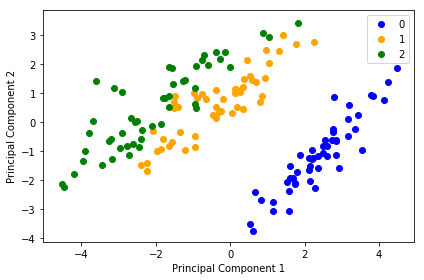

In [7]:
# (d) Visualize after projecting to 2-D space

def viz(Y, y, x):
    
        plt.figure(figsize=(6, 4))
        
        for lab, col in zip(( 0, 1, 2), ('blue', 'orange', 'green')):
            plt.scatter(Y[y==lab, 0],
                        Y[y==lab, 1],
                        label=lab,
                        c=col)
    
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.show()
    
    
viz(Y, labels, datafile)

[EigenValue     Variance     Cumulative_Variance]
[[  4.74298961  58.89212098  58.89212098]
 [  2.29585309  28.50684249  87.39896347]
 [  0.77691051   9.64663886  97.04560233]
 [  0.2041729    2.53514686  99.58074919]
 [  0.03376517   0.41925081 100.        ]
 [  0.           0.         100.        ]
 [ -0.          -0.         100.        ]
 [ -0.          -0.         100.        ]]


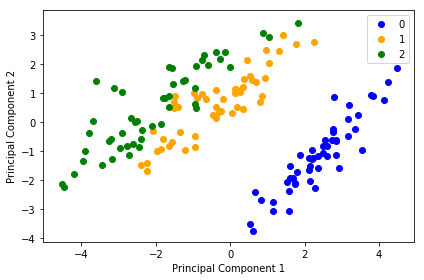

In [8]:
def main():

    eval(sorted_evalues, sorted_evectors)
    viz(Y, labels, datafile)

if __name__ == "__main__":
    main()

If the number of features is 1000 and the number of data points is 10, what will be the dimension of your covariance matrix? Can you suggest what can be changed to improve the performance?

The dimensions of covariance matrix will be "1000 by 1000". It is a square matrix for describing covariance between each pair of features. 
We can decrease the number of features to be less than the number of examples as the majority of covariance is expalined by first few of the eigen vectors. Also, increasing the number of data points always helps to improve performance. 



![title](problem_3_e2.jpg)

# References:

https://plot.ly/ipython-notebooks/principal-component-analysis/

https://sebastianraschka.com/Articles/2014_pca_step_by_step.html
